In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

# Understand the Problem Statement
 Overview
 1. What is Brain Tumor? 
https://my.clevelandclinic.org/health/diseases/6149-brain-cancer-brain-tumor

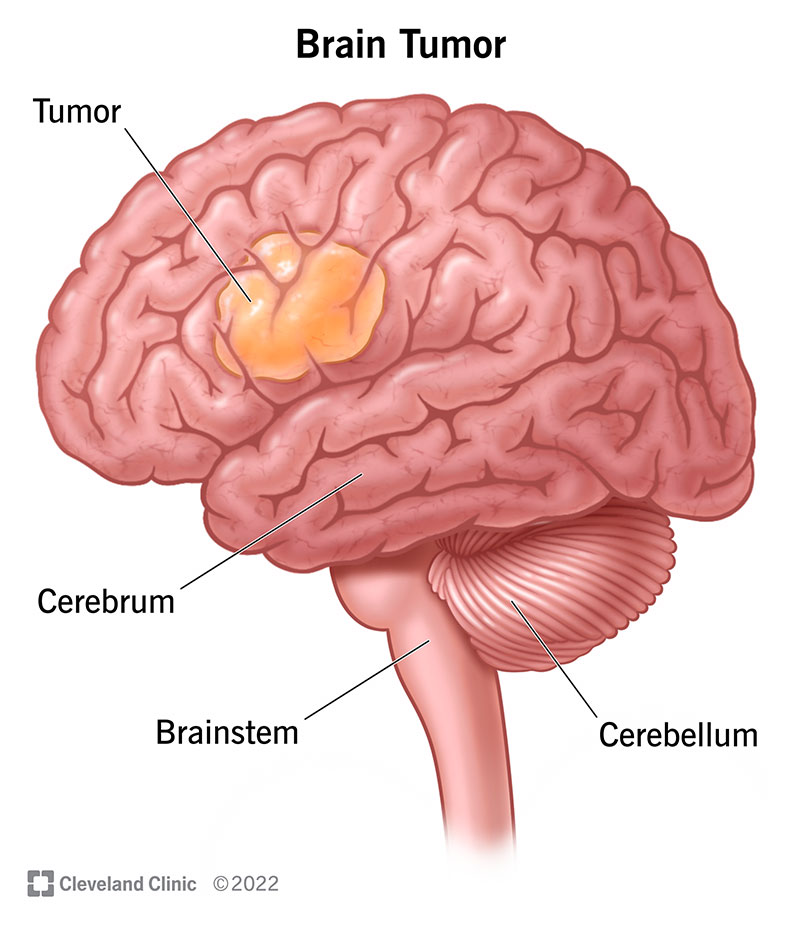!
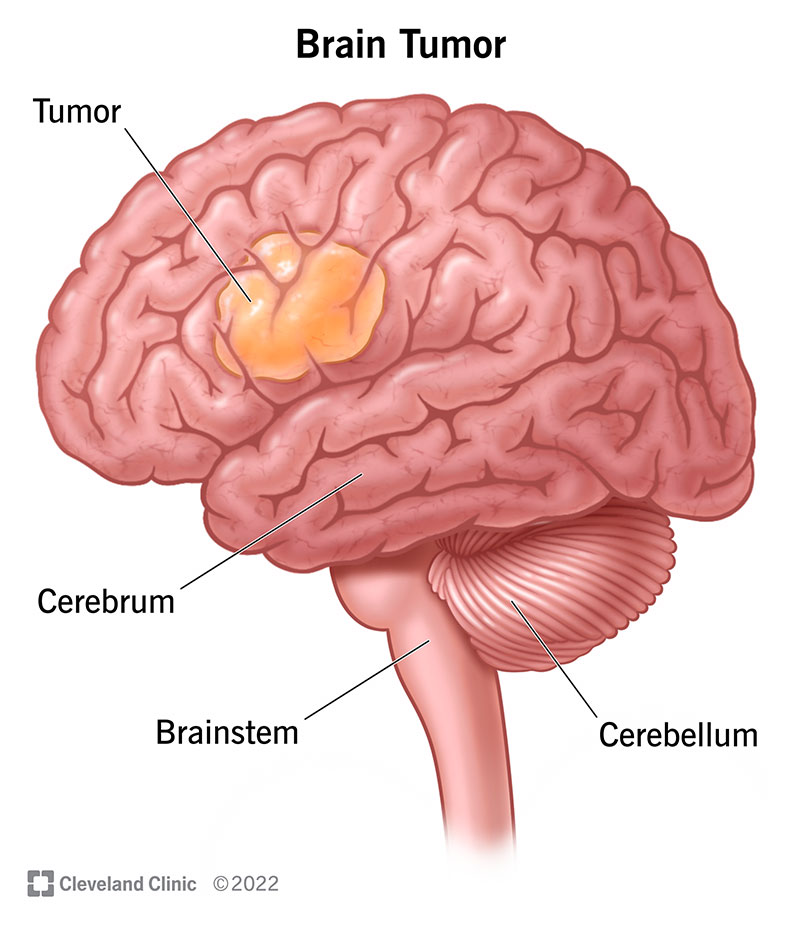

 3. Why to do AI based Classi cation?
 4. What is MRI Image
    
 Classify The Brain Tumor Type among
 1. Pituitary
 2. Meningioma
 3. Glioma
 4. No Tumor
    
 Using MRI Images.
 
 ** CNN Image Classi cation Model for MRI Images with 4 Classes **

# Understanding The Dataset
This dataset contains a collection of 3264 high-resolution Brain MRI (Magnetic Resonance Imaging) scans, specically curated for brain tumor detection and classi cation. Each MRI image is labeled with one of four classes: "pituitary," "meningioma," "glioma," or "no tumor."

Dataset Details:
- Total Number of Images: 3264
- MRI Images Classes:
  
Testing Data
- Pituitary (74 images)
- Meningioma (115 images)
- Glioma (100 images)
- No Tumor (105 images)
  
Training Data
- Pituitary (827 images)
- Meningioma (822 images)
- Glioma (826 images)
- No Tumor (395 images)

# Import the libraries

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import tensorflow as tf
import keras
from keras import layers
from keras.callbacks import EarlyStopping,ModelCheckpoint
#from keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
Image_Size = 256 # 256 X256
Batch_Size = 64
Channels = 3 #RGB
Epochs = 25
num_classes = 4
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
 "/kaggle/input/brain-tumor-classification-mri/Training",
    shuffle = True,
    image_size = (Image_Size, Image_Size),
    batch_size = Batch_Size,
    label_mode="categorical"
 )

Found 2870 files belonging to 4 classes.


In [5]:
dataset_testing = tf.keras.preprocessing.image_dataset_from_directory(
 "/kaggle/input/brain-tumor-classification-mri/Testing",
    shuffle = True,
    image_size = (Image_Size, Image_Size),
    batch_size = Batch_Size,
    label_mode="categorical"
 )

Found 394 files belonging to 4 classes.


# Data processing and model building

- Custom model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
model = keras.Sequential()
 # Block 1
 model.add(Conv2D(32,kernel_size=(3, 3),
                      activation="relu", padding ="same", input_shape=(Image_Size, Image_Size,Channels)))
 model.add(BatchNormalization())
 model.add(Conv2D(32, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 #Block 2
 model.add(Conv2D(64,kernel_size=(3, 3),
                      activation="relu", padding ="same"))
 model.add(BatchNormalization())
 model.add(Conv2D(64, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 #Block3
 model.add(Conv2D(128,kernel_size=(3, 3),
                      activation="relu", padding ="same"))
 model.add(BatchNormalization())
 model.add(Conv2D(128, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 #Block4
 model.add(Conv2D(256,kernel_size=(3, 3),
                      activation="relu", padding ="same"))
 model.add(BatchNormalization())
 model.add(Conv2D(256, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 #Block5
 model.add(Conv2D(512,kernel_size=(3, 3),
                      activation="relu", padding ="same"))
 model.add(BatchNormalization())
 model.add(Conv2D(512, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 #Block6
 model.add(Conv2D(1024,kernel_size=(3, 3),
                      activation="relu", padding ="same"))
 model.add(BatchNormalization())
 model.add(Conv2D(1024, kernel_size=(3, 3),
                      activation="relu",padding ="same"))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Flatten())
 model.add(Dense(1024,activation="relu" ))
 model.add(Dropout(0.25))
 model.add(Dense(512,activation="relu" ))
 model.add(Dropout(0.25))
 model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         590,0

 Total params: 36,191,268 (138.06 MB)

 Trainable params: 36,183,204 (138.03 MB)

 Non-trainable params: 8,064 (31.50 KB)

# Model training and model evaluation

In [12]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
loss='categorical_crossentropy',
               metrics=['accuracy'])

In [1]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,  # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

NameError: name 'model' is not defined

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

# Well Known PreTrained Model

# VGG19

# Build the model

In [ ]:
from keras.models import Model
from keras.applications import VGG19

In [ ]:
IMAGE_SIZE = [Image_Size, Image_Size]  # we will keep the image size as (224,224). You can increase the size for better result

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required 

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False
     
x = Flatten()(vgg.output)
x = Dense(4096, activation = 'relu')(x) # we can add a new fully connected layer but it will increase the execution time  
x = Dense(1096, activation = 'relu')(x)  # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label cla

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,  # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

# ResNet50

In [ ]:
from keras.models import Model
from keras.applications import ResNet50

IMAGE_SIZE = [Image_Size, Image_Size]  # we will keep the image size as (224,224). You can increase the size for better result

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
resent = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as req

# this will exclude the initial layers from training phase as there are already been trained.
for layer in resent.layers:
    layer.trainable = False
    
x = Flatten()(resent.output)
x = Dense(4096, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(1096, activation = 'relu')(x)    # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label cla

model = Model(inputs = resent.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,  # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

# InceptionV3

In [ ]:
from keras.applications import InceptionV3

IMAGE_SIZE = [Image_Size, Image_Size]  # we will keep the image size as (224,224). You can increase the size for better result

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
inpt = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as req

# this will exclude the initial layers from training phase as there are already been trained.
for layer in inpt.layers:
    layer.trainable = False

x = Flatten()(inpt.output)
x = Dense(4096, activation = 'relu')(x)  # we can add a new fully connected layer but it will increase the execution time. 
x = Dense(1096, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label cla

model = Model(inputs = inpt.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,   # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

#  DenseNet121

In [ ]:
from keras.applications import DenseNet121

IMAGE_SIZE = [Image_Size, Image_Size]  # we will keep the image size as (224,224). You can increase the size for better result

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
dnet = DenseNet121(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as req

# this will exclude the initial layers from training phase as there are already been trained.
for layer in dnet.layers:
    layer.trainable = False
     
x = Flatten()(dnet.output)
x = Dense(4096, activation = 'relu')(x)  # we can add a new fully connected layer but it will increase the execution time. 
x = Dense(2046, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time. 
x = Dense(1024, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label cla

model = Model(inputs = dnet.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,   # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

#  ConvNeXtBase

In [ ]:
from keras.applications import ConvNeXtBase

IMAGE_SIZE = [Image_Size, Image_Size]  # we will keep the image size as (224,224). You can increase the size for better result

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
CnBnet = ConvNeXtBase(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as

# this will exclude the initial layers from training phase as there are already been trained.
for layer in CnBnet.layers:
    layer.trainable = False
     
x = Flatten()(CnBnet.output)
x = Dense(4096, activation = 'relu')(x)  # we can add a new fully connected layer but it will increase the execution time. 
x = Dense(2046, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time. 
x = Dense(1024, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label cla

model = Model(inputs = CnBnet.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(dataset_train,
                   steps_per_epoch = 100,  # this should be equal to total number of images in training set. But to speed up t
                   epochs = Epochs,   # change this for better results
                   validation_data = dataset_testing,
                   validation_steps = 100)  # this should be equal to total number of images in validation set.

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy']))
print ('Validation Accuracy = ' + str(history.history['val_accuracy']))

In [ ]:
model.evaluate(dataset_testing)

#  Result & Conclusion

- Select the Model, Which give better performance and then Further Optimise
- VGG19 and ResNet50 - 75.88% Validation Accuracy
- Stage 2 - Advance approach to Improve Performance - 95%

# Model Name Training Accuracy Test Accuracy
- Display - All Models and Their Perfoamnce